## Portfolio Optimization

An investment firm wants to allocate its capital among a set of assets to maximize expected return while minimizing risk. Each asset has an expected return, a risk level, and there are constraints on the maximum and minimum investment in each asset. The goal is to determine the optimal allocation of capital.

Available Assets:

    Asset A:
        Expected Return: 8%
        Risk (Standard Deviation): 5%
    Asset B:
        Expected Return: 10%
        Risk (Standard Deviation): 7%
    Asset C:
        Expected Return: 12%
        Risk (Standard Deviation): 10%

Constraints:

    The total investment must equal the available capital (e.g., $100,000).
    No more than 50% of the total capital can be invested in any single asset.
    At least 20% of the total capital must be invested in Asset C.
    The sum of the investments in Asset A and Asset B should be at least 40% of the total capital.

Variables:

    a: Amount invested in Asset A
    b: Amount invested in Asset B
    c: Amount invested in Asset C

Objective Function:

Maximize the total expected return while minimizing risk, according to some weighting paramater.

In [35]:
from z3 import *

total_capital = 100000

def optimal_investment(weighting_param):
    """
    Outputs an optimal investment strategy given a weighting parameter. 

    Args:
        weighting_param (Float): Provides weights for the optimization function.
        Should be a value between 0 and 1.
    """    
    solver = Optimize()

    a = Real('a') 
    b = Real('b')
    c = Real('c')

    constraints = [
        a + b + c == total_capital,
        a <= 0.5*total_capital,
        b <= 0.5*total_capital,
        c <= 0.5*total_capital,
        c >= 0.2*total_capital,
        a + b >= 0.4*total_capital,
        a >= 0,
        b >= 0,
        c >= 0
    ]

    solver.add(constraints)

    total_return = 0.08*a + 0.10*b + 0.12*c
    total_risk = 0.05*a + 0.07*b + 0.10*c

    objective_function = weighting_param * total_return - (1 - weighting_param) * total_risk

    solver.maximize(objective_function)

    if solver.check() == sat:
        model = solver.model()
        print(f"Optimal investment plan:")
        print(f"  Investment in Asset A: {model.evaluate(a)}")
        print(f"  Investment in Asset B: {model.evaluate(b)}")
        print(f"  Investment in Asset C: {model.evaluate(c)}")
        obj_value = model.evaluate(objective_function)
        obj_value = obj_value.as_fraction()
        obj_value_float = round(float(obj_value.numerator) / float(obj_value.denominator))
        print(f"Maximized objective value: {obj_value_float}")
        print()
    else:
        print("No solution found")
        return None
    
    return [model.evaluate(a).as_long(), model.evaluate(b).as_long(), model.evaluate(c).as_long()]

investments = optimal_investment(0.7)


Optimal investment plan:
  Investment in Asset A: 0
  Investment in Asset B: 50000
  Investment in Asset C: 50000
Maximized objective value: 5150



Expected value of portfolio: 211000
Standard Deviation: 8500


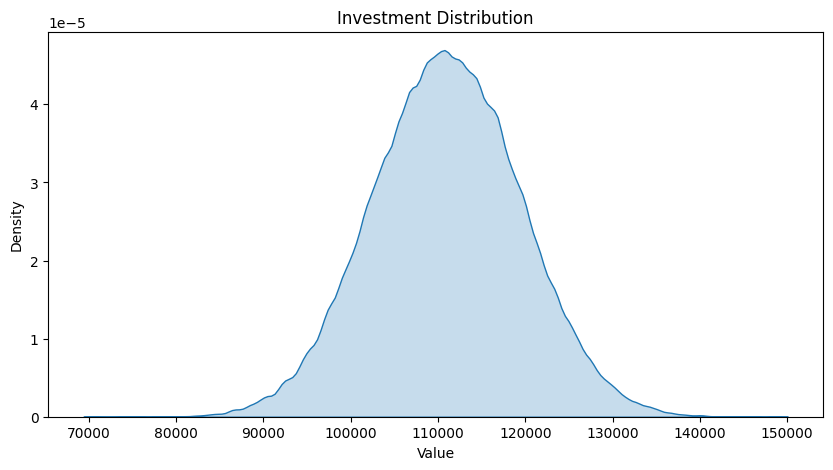

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def port_stats(portfolio, capital):
    """
    Calculates expected value and standard deviation of portfolio. 
    Outputs a plot of X, where X is the value of your portfolio after some investment period. 
    X is assumed to be normally distributed.

    Args:
        portfolio (List): Portfolio allotment for each of 3 investments.
        capital (Int): Starting capital.

    Returns:
        Dict: EV and standard dev.
    """    
    a, b, c = portfolio

    expected_return = 0.08*a + 0.10*b + 0.12*c + total_capital
    std_dev = 0.05*a + 0.07*b + 0.10*c

    print("Expected value of portfolio:", round(expected_return + total_capital))
    print("Standard Deviation:", round(std_dev))

    # Plotting
    data = np.random.normal(expected_return, std_dev, size = 100000)
    plt.figure(figsize=(10,5))
    sns.kdeplot(data, bw_adjust=0.5, fill=True)
    plt.title('Investment Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

    return {'EV': expected_return + total_capital, 'SD': std_dev}

stats = port_stats(investments, total_capital)
